<a href="https://colab.research.google.com/github/Constratum/engineering-standards/blob/main/Seismic_Performance_Category_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table 5 - Technical Note 10

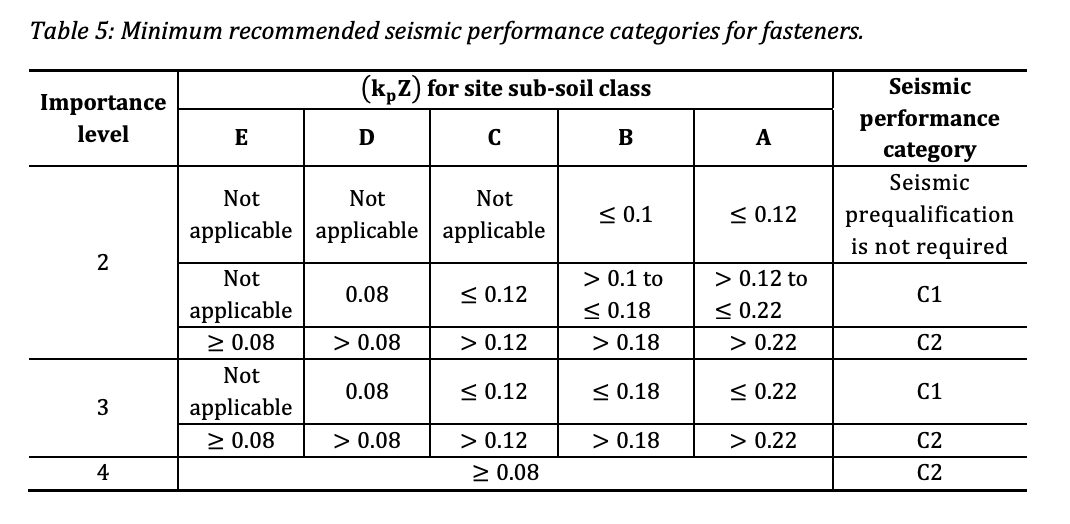

In [1]:
def get_seismic_performance_category(importance_level: int, site_class: str, kpz_value: float) -> str:
    """
    Calculates the seismic performance category based on Importance Level,
    Site Sub-soil Class, and the (kpZ) value, according to the provided table.

    Args:
        importance_level (int): The importance level (e.g., 2, 3, 4).
        site_class (str): The site sub-soil class (e.g., 'A', 'B', 'C', 'D', 'E').
        kpz_value (float): The (kpZ) value for the site sub-soil class.

    Returns:
        str: The seismic performance category (e.g., "C1", "C2",
             "Seismic prequalification is not required", or an error/not applicable message).
    """
    site_class = site_class.upper()

    # Input validation
    if not isinstance(importance_level, int) or importance_level not in [2, 3, 4]:
        return "Invalid importance level. Must be an integer: 2, 3, or 4."
    if not isinstance(site_class, str) or site_class not in ['A', 'B', 'C', 'D', 'E']:
        return "Invalid site sub-soil class. Must be a string: 'A', 'B', 'C', 'D', or 'E'."
    if not isinstance(kpz_value, (float, int)):
        return "Invalid kpZ value. Must be a number."

    kpz_value = float(kpz_value) # Ensure kpz_value is float for comparisons

    if importance_level == 2:
        if site_class == 'E':
            # C1: Not applicable in table
            # C2: kpz >= 0.08
            # "Seismic prequalification is not required": Not applicable in table
            if kpz_value >= 0.08:
                return "C2"
            else:
                # If kpz < 0.08, it's not C2. C1 is "Not applicable".
                # The "Seismic prequalification is not required" row also shows "Not applicable".
                return "Not applicable (IL2, Class E, kpz < 0.08)"
        elif site_class == 'D':
            # C1: 0.08
            # C2: > 0.08
            # "Seismic prequalification is not required": Not applicable in table
            if kpz_value > 0.08:
                return "C2"
            elif kpz_value == 0.08: # Assuming exact match for C1 as per "0.08"
                return "C1"
            else: # kpz_value < 0.08
                return "Not applicable (IL2, Class D, kpz < 0.08)"
        elif site_class == 'C':
            # C1: <= 0.12
            # C2: > 0.12
            # "Seismic prequalification is not required": Not applicable in table
            if kpz_value > 0.12:
                return "C2"
            else: # kpz_value <= 0.12
                return "C1"
        elif site_class == 'B':
            # Top row: <= 0.1 -> Seismic prequalification is not required
            # C1: > 0.1 to <= 0.18
            # C2: > 0.18
            if kpz_value <= 0.1:
                return "Seismic prequalification is not required"
            elif kpz_value > 0.18:
                return "C2"
            elif kpz_value > 0.1 and kpz_value <= 0.18: # kpz_value is already > 0.1 due to the first check
                return "C1"
            else:
                 # This case should ideally not be reached if kpz_value is always > 0.1 here.
                 # Handles potential floating point inaccuracies if kpz_value is extremely close to 0.1 but slightly less.
                 return f"Uncategorized (IL2, Class B, kpz={kpz_value})"
        elif site_class == 'A':
            # Top row: <= 0.12 -> Seismic prequalification is not required
            # C1: > 0.12 to <= 0.22
            # C2: > 0.22
            if kpz_value <= 0.12:
                return "Seismic prequalification is not required"
            elif kpz_value > 0.22:
                return "C2"
            elif kpz_value > 0.12 and kpz_value <= 0.22: # kpz_value is already > 0.12
                return "C1"
            else:
                 return f"Uncategorized (IL2, Class A, kpz={kpz_value})"

    elif importance_level == 3:
        # For IL3, C1/C2 rows are similar to IL2.
        # "Seismic prequalification is not required" conditions (kpz <=0.1 for B, kpz <=0.12 for A)
        # from the general top part of the table should still take precedence.
        if site_class == 'E':
            # C1: Not applicable
            # C2: kpz >= 0.08
            if kpz_value >= 0.08:
                return "C2"
            else:
                return "Not applicable (IL3, Class E, kpz < 0.08)"
        elif site_class == 'D':
            # C1: 0.08
            # C2: > 0.08
            if kpz_value > 0.08:
                return "C2"
            elif kpz_value == 0.08:
                return "C1"
            else: # kpz_value < 0.08
                return "Not applicable (IL3, Class D, kpz < 0.08)"
        elif site_class == 'C':
            # C1: <= 0.12
            # C2: > 0.12
            if kpz_value > 0.12:
                return "C2"
            else: # kpz_value <= 0.12
                return "C1"
        elif site_class == 'B':
            # Precedence:
            # 1. "Seismic prequalification is not required" (kpz <= 0.1 from general IL2/3 rule)
            # 2. C2 (kpz > 0.18 from IL3 C2 row)
            # 3. C1 (kpz <= 0.18 from IL3 C1 row, and not meeting above)
            if kpz_value <= 0.1: # From general rule for IL2/3 (applies to B)
                return "Seismic prequalification is not required"
            elif kpz_value > 0.18: # From IL3 C2 row
                return "C2"
            elif kpz_value <= 0.18: # From IL3 C1 row (implicitly kpz_value > 0.1 here)
                return "C1"
            else: # Should not be reached
                 return f"Uncategorized (IL3, Class B, kpz={kpz_value})"
        elif site_class == 'A':
            # Precedence:
            # 1. "Seismic prequalification is not required" (kpz <= 0.12 from general IL2/3 rule)
            # 2. C2 (kpz > 0.22 from IL3 C2 row)
            # 3. C1 (kpz <= 0.22 from IL3 C1 row, and not meeting above)
            if kpz_value <= 0.12: # From general rule for IL2/3 (applies to A)
                return "Seismic prequalification is not required"
            elif kpz_value > 0.22: # From IL3 C2 row
                return "C2"
            elif kpz_value <= 0.22: # From IL3 C1 row (implicitly kpz_value > 0.12 here)
                return "C1"
            else: # Should not be reached
                return f"Uncategorized (IL3, Class A, kpz={kpz_value})"

    elif importance_level == 4:
        if site_class == 'E' or site_class == 'D':
            # Table shows blank for C2 for E, D under IL4. C1 is not mentioned.
            return "Category not specified/Not applicable (IL4, Class E/D)"
        elif site_class in ['C', 'B', 'A']:
            # Only C2 is specified: kpz >= 0.08
            if kpz_value >= 0.08:
                return "C2"
            else: # kpz_value < 0.08
                return "C2 requirement not met (IL4, Class C/B/A, kpz < 0.08)"

    # Fallback for any unhandled valid input combinations (should ideally not occur with current logic)
    return "Unhandled valid input combination."

# Example Usage:
# print(get_seismic_performance_category(importance_level=2, site_class='B', kpz_value=0.05))
# print(get_seismic_performance_category(importance_level=2, site_class='B', kpz_value=0.15))
# print(get_seismic_performance_category(importance_level=2, site_class='B', kpz_value=0.20))

# print(get_seismic_performance_category(importance_level=3, site_class='A', kpz_value=0.10))
# print(get_seismic_performance_category(importance_level=3, site_class='A', kpz_value=0.22))
# print(get_seismic_performance_category(importance_level=3, site_class='A', kpz_value=0.25))

# print(get_seismic_performance_category(importance_level=4, site_class='C', kpz_value=0.07))
# print(get_seismic_performance_category(importance_level=4, site_class='C', kpz_value=0.08))

# print(get_seismic_performance_category(importance_level=2, site_class='E', kpz_value=0.07))
# print(get_seismic_performance_category(importance_level=2, site_class='E', kpz_value=0.08))

# print(get_seismic_performance_category(importance_level=5, site_class='A', kpz_value=0.1)) # Invalid IL
# print(get_seismic_performance_category(importance_level=2, site_class='X', kpz_value=0.1)) # Invalid Site Class
# print(get_seismic_performance_category(importance_level=2, site_class='A', kpz_value="test")) # Invalid kpz

In [4]:
get_seismic_performance_category(4, "B",0.1 )

'C2'